In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

In [3]:
url_basica="https://www.gestionypoliticapublica.cide.edu/ojscide/index.php/gypp/issue/view/"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'}

In [4]:
autores=[]
for numeros in range(13,32):
    url=url_basica+str(numeros)
    response = requests.get(url, headers=headers,verify=False)
    soup = BeautifulSoup(response.text, 'html.parser')
    #Obtenemos los autores
    for autor in soup.find_all('div', class_='authors'):
        autores.append(autor.text.strip())

#Cada coma es un autor
autores=[autor.split(',') for autor in autores]
autores=[autor for lista in autores for autor in lista]
#Eliminar espacios en blanco
autores=[autor.strip() for autor in autores]

c:\Users\claud\miniconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.gestionypoliticapublica.cide.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\claud\miniconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.gestionypoliticapublica.cide.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
c:\Users\claud\miniconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.gestionypoliticapublica.cide.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warning

In [18]:
#Pasar a dataframe con columna llamada autor
df = pd.DataFrame(autores, columns=['autor'])
#Sustituir "David Arellano" por "David Arellano Gault"
df['autor'] = df['autor'].replace('David Arellano', 'David Arellano Gault')
#Agrupar por autor y contar cuantas veces aparece
df = df.groupby('autor').size().reset_index(name='counts')
#Ordenar de mayor a menor
df = df.sort_values(by=['counts'], ascending=True)
df

,autor,counts
0,Abraham Allec Londoño Pineda,1
214,Mariano Mosquera,1
213,Mariana Chudnovsky,1
212,Maria Tereza Silveira Böhme,1
210,Marcelo Ruiz Toledo,1
...,...,...
292,Silvia Blancas Ramírez,2
30,Antonio Villalpando Acuña,2
192,Luis Jair Trejo Alonso,3
233,Mauricio I. Dussauge Laguna,4


Text(0.2, 0, '@claudiodanielpc con información de la página de la revista Gestión y Política del CIDE')

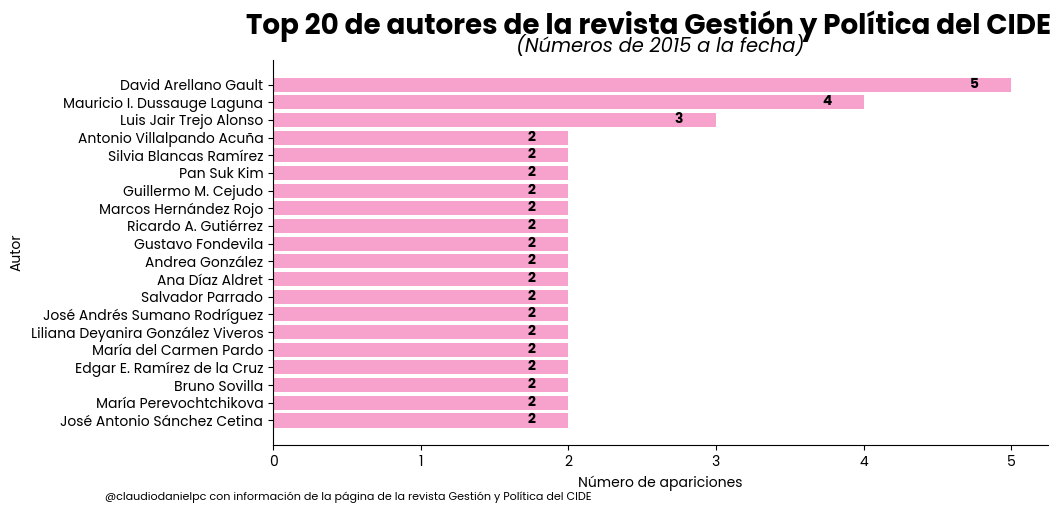

In [45]:
#Gráfica de barras con el top 10
plt.rcParams['font.family'] = 'Poppins'
plt.figure(figsize=(10,5))
plt.barh(df['autor'].tail(20), df['counts'].tail(20), align='center', alpha=0.5, color='#f0449c')
plt.xlabel('Número de apariciones')
plt.ylabel('Autor')
plt.suptitle('Top 20 de autores de la revista Gestión y Política del CIDE', fontsize=20, fontweight='bold')
plt.title('(Números de 2015 a la fecha)', fontsize=14,fontstyle='italic')
#Eliminar los bordes de la gráfica
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#Etiquetas 
for i, v in enumerate(df['counts'].tail(20)):
    plt.text(v - 0.5/2, i, str(v), color='black', fontweight='bold', ha='center', va='center')
#Fuente de los datos
plt.figtext(0.2, 0, '@claudiodanielpc con información de la página de la revista Gestión y Política del CIDE', horizontalalignment='center', fontsize=8)

